# Assignment 09

Learning goal: develop confidence working with Google Earth Engine and build comfort working with new datasets.

The tools needed to complete this assignment are largely found within the Intro Python Tutorial that you have gone through.
If you haven't already, please pause, and run through this tutorial, copying each cell block of text from the tutorial
into a new notebook.  Here is the web address to the tutorial: https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api-guiattard

Skim this website to learn the fundamental building blocks (i.e., objects and methods) of EE: 
https://developers.google.com/earth-engine/guides/objects_methods_overview

With the above knowledge, I hope that you will be able to use the [tutorial](https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api-guiattard) 
as something of a guide, and copy, paste, and modify the steps used in the tutorial to meet the specific goals
of this assignment.

As always, post your questions on slack!


In [1]:
import ee
from IPython.display import Image
import pandas as pd

import folium # For super-cool interactive maps


In [2]:
ee.Initialize() # necessary to let Google know who you are, and that you'll be using GEE tools.


## Exploring snow cover in and around Moscow
There is a daily estimate of snow cover from the MODIS Terra satellite,
using a band ratio metric akin to the NDVI we've used previously.  This metric
is known as the Normalized Difference Snow Index (NDSI).  We'll use this NASA
data product, available through Google Earth Engine.

Find the MOD10A1.006 Terra Snow Cover Daily Global 500m within the Earth Engine Data Catalog:
https://developers.google.com/earth-engine/datasets

Review the Bands that are reported for this dataset.  On the Bands page, each Band of the
dataset is named with bold font, and then, to the right of the name, is a range of various
different kinds of information defining what is included in each band.



In [3]:
# Create an ee.ImageCollection variable named "snow"
#   complete the following line of code
snow = ee.ImageCollection("MODIS/006/MOD10A1") #MOD10A1.006 Terra Snow Cover Daily Global 500m

In [4]:
# Find how many images are in the ImageCollection
snow.size().getInfo() #images

7859

In [5]:
# Use getInfo() to report the contents of the first Image of the 'snow' ImageCollection
snow_cover = snow.first().getInfo()
snow_cover

{'type': 'Image',
 'bands': [{'id': 'NDSI_Snow_Cover',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [86400, 43200],
   'crs': 'SR-ORG:6974',
   'crs_transform': [463.312716528,
    0,
    -20015109.354,
    0,
    -463.312716527,
    10007554.677]},
  {'id': 'NDSI_Snow_Cover_Basic_QA',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [86400, 43200],
   'crs': 'SR-ORG:6974',
   'crs_transform': [463.312716528,
    0,
    -20015109.354,
    0,
    -463.312716527,
    10007554.677]},
  {'id': 'NDSI_Snow_Cover_Algorithm_Flags_QA',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [86400, 43200],
   'crs': 'SR-ORG:6974',
   'crs_transform': [463.312716528,
    0,
    -20015109.354,
    0,
    -463.312716527,
    10007554.677]},
  {'id': 'NDSI',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
  

Recognize above that, after `type` (`Image`), the different bands are all identified according to their
`id` (name) and other information about the contents of the band.

We want a simple, straightforward way to assess the percentage of a pixel (500 m x 500 m) that
is snow covered.  So we need to find which band contains this information.  The Google Earth Engine
Data Catalog suggests which band this might be, but it can be a little opaque.  To clarify the contents
of the bands, go to the
National Snow and Ice Data Center (NSIDC- which is a NASA data repository) and is the actual home/source
of this data product.  Earth Engine serves it, but the product is really from NASA and is distributed
by the NSIDC.  There are two ways this can be accessed from Earth Engine.  I've circled and
drawn an arrow next to these options.

<!-- ![title](find_documentation.png) -->
<img src="find_documentation.png" alt="alt text" width="500"/>

Within the NSIDC dataset website, you'll find more information about the origin of the dataset, and
how to use it.  You'll see multiple tabs, starting with "Overview" (basic metadata), "Download
Data" (don't do it!  We're using Earth Engine!!!), "Citing ...", "User Guide," etc.

The User Guide describes the origin of these data, how they were processed, etc.  Give the User Guide
pdf a look on the NSIDC website to decide which band to use going forward, as your best estimate
of snow cover.


In [6]:
## NDSI_Snow_Cover band

### Mean snow cover in Moscow
Find the mean snow cover over all times at location just outside of Moscow.
To avoid any impacts associated with the town itself (i.e., buildings, parking lots, plowing, etc.),
choose a coordinate to `sample` that is just outside the developed regions of the town.  You might
use Google Earth, or some other GIS software, to pick this coordinate.

In [7]:
#Filter collection on the period of time we want 
#Selecting snow cover over all times
i_date = '2000-02-24' #inital date
f_date = '2021-10-26' #final date

snow = snow.select('NDSI_Snow_Cover').filterDate(i_date, f_date)

In [8]:
#Define the location of interest
#Across the road from the cemetary
m_poi_lon = -116.9767 
m_poi_lat = 46.71767
m_poi = ee.Geometry.Point(m_poi_lon, m_poi_lat)

scale = 500 #meters

In [9]:
#Calculate and print the mean value of the snow cover for the sample location
sample_snow_cover_mean = snow.mean().sample(m_poi, scale).first().get('NDSI_Snow_Cover').getInfo()
print('Average snow cover value for Moscow point of interest:', round(sample_snow_cover_mean))

Average snow cover value for Moscow point of interest: 4


In [10]:
# Define the location of interest for Moscow.
moscow_lon = -117.03 # -117.00
moscow_lat = 46.72 #46.732
moscow_lon = -116.98 # -117.00
moscow_lat = 46.75 #46.732
moscow_poi = ee.Geometry.Point(moscow_lon, moscow_lat)

# Define the operative scale of the dataset.  This is important for defining how EE does its analyses.
#    This should be the resolution of the data product.
scale = 500  # scale in meters


### Visualize the mean snow cover

Calculate the mean snow cover of the entire dataset.  For the region around Moscow, plot this mean snow cover.

In [30]:
moscow_poi_buffer = moscow_poi.buffer(1000)

In [45]:
snow_img = snow.mean()

In [54]:
#not sure what the value for dimension is supposed to be
from IPython.display import Image

# Create a URL to the styled image for a region
url = snow_img.getThumbUrl({
    'min': 0, 'max': 100, 'dimensions': 500, 'region': moscow_poi_buffer,
    'palette': ['green', 'yellow', 'orange', 'red']})
print(url)

# Display the thumbnail land surface temperature in France.
print('\nPlease wait while the thumbnail loads, it may take a moment...')
Image(url=url)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/e41cbad620c4d2616789f3d290d18331-2a5c3e18bdd125fc933b66d88a05f4b6:getPixels

Please wait while the thumbnail loads, it may take a moment...


#### Set up a Folium map to explore the output data with

In [59]:
elev = ee.Image('USGS/SRTMGL1_003') # Read in the STRM dataset as an EE Image
#####snow_cover = ee.Image('')

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Create a folium map object.
my_map = folium.Map(location=[46.8, -117], zoom_start=10)

# Set visualization parameters for the elevation dataset
elev_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# #####snow_cover_params = {
#     'min': 0,
#   'max': 100,
#   'palette': ['green', 'yellow', 'orange', 'red']}

# Add the elevation model to the map object.
my_map.add_ee_layer(elev, elev_params, 'DEM')
# my_map.add_ee_layer(snow_cover, snow_cover_params, 'NDSI_Snow_Cover')


# Add a layer control panel to the map.
# my_map.add_child(folium.LayerControl())
folium.LayerControl(collapsed = False).add_to(my_map)


# Display the map.
display(my_map)

### Interpretting the snow cover
Add a layer to the Folium map above that includes the mean of all the snow cover measurements.
Note in the map above there there are only a few lines used to define the `elev_params` and then one 
line that uses `add_ee_layer` to add the `elev` dataset to the map.  You can reproduce (and modify)
these lines to show your map of mean snow cover.

Write a few sentences to interpret the spatial patterns in mean snow cover in the several 10s of km
basin surrounding Moscow.

## Examining time series of snow cover around Moscow
Your goal now is to produce a time series of snow cover (from MODIS NDSI) near Moscow (but again, just outside Moscow, to
avoide city effects).

Again, following the example from the [Python API tutorial](https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api-guiattard).
Produce an array (technically a list of lists in this case) with all of the snow cover measurements of your Moscow
coordinates.

In [13]:
data_m_poi = snow.getRegion(m_poi, scale).getInfo()
data_m_poi[:10]

[['id', 'longitude', 'latitude', 'time', 'NDSI_Snow_Cover'],
 ['2000_02_24', -116.9763705098338, 46.719132138846014, 951350400000, None],
 ['2000_02_25', -116.9763705098338, 46.719132138846014, 951436800000, 0],
 ['2000_02_26', -116.9763705098338, 46.719132138846014, 951523200000, None],
 ['2000_02_27', -116.9763705098338, 46.719132138846014, 951609600000, None],
 ['2000_02_28', -116.9763705098338, 46.719132138846014, 951696000000, None],
 ['2000_02_29', -116.9763705098338, 46.719132138846014, 951782400000, None],
 ['2000_03_01', -116.9763705098338, 46.719132138846014, 951868800000, None],
 ['2000_03_02', -116.9763705098338, 46.719132138846014, 951955200000, None],
 ['2000_03_03', -116.9763705098338, 46.719132138846014, 952041600000, None]]

In [14]:
# Function to transform the EE array (list of lists) into a pandas dataframe
def ee_array_to_df(arr, list_of_bands):
    """Transforms client-side ee.Image.getRegion array to pandas.DataFrame."""
    df = pd.DataFrame(arr)

    # Rearrange the header.
    headers = df.iloc[0]
    df = pd.DataFrame(df.values[1:], columns=headers)

    # Remove rows without data inside.
    df = df[['longitude', 'latitude', 'time', *list_of_bands]].dropna()

    # Convert the data to numeric values.
    for band in list_of_bands:
        df[band] = pd.to_numeric(df[band], errors='coerce')

    # Convert the time field into a datetime.
    df['datetime'] = pd.to_datetime(df['time'], unit='ms')

    # Keep the columns of interest.
    df = df[['time','datetime',  *list_of_bands]]

    return df

Use the function above to create a DataFrame that includes snow cover as a function of time.  Show
that DataFrame below.

In [15]:
df_m_poi = ee_array_to_df(data_m_poi, ['NDSI_Snow_Cover'])
df_m_poi

,time,datetime,NDSI_Snow_Cover
1,951436800000,2000-02-25,0
15,952646400000,2000-03-10,0
19,952992000000,2000-03-14,0
26,953596800000,2000-03-21,0
31,954028800000,2000-03-26,0
...,...,...,...
7843,1633910400000,2021-10-11,0
7844,1633996800000,2021-10-12,0
7848,1634342400000,2021-10-16,0
7851,1634601600000,2021-10-19,0


Create a plot of the snow cover as a function of time, for the full time series, up to the present.

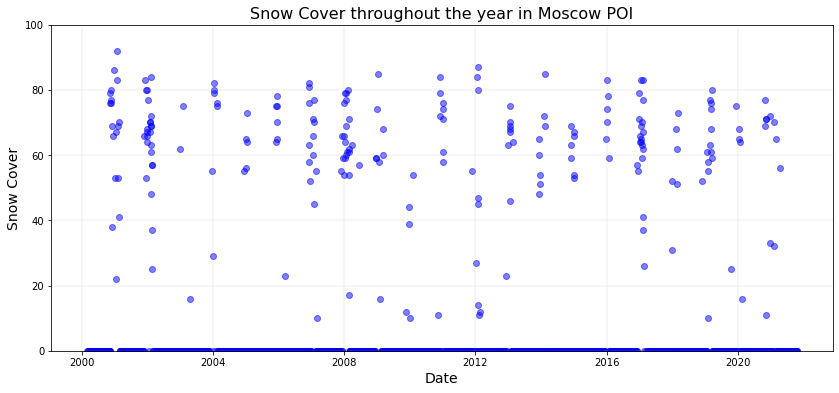

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
%matplotlib inline

# Fitting curves.
## First, extract x values (times) from the dfs.
x_data_m_poi = np.asanyarray(df_m_poi['time'].apply(float))

## Secondly, extract y values (snow cover) from the dfs.
y_data_m_poi = np.asanyarray(df_m_poi['NDSI_Snow_Cover'].apply(float))

# Subplots.
fig, ax = plt.subplots(figsize=(14, 6))

# Add scatter plots.
ax.scatter(df_m_poi['datetime'], df_m_poi['NDSI_Snow_Cover'],
           c='blue', alpha=0.5, label='Snow Cover')

# Add some parameters.
ax.set_title('Snow Cover throughout the year in Moscow POI', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Snow Cover', fontsize=14)
ax.set_ylim(-0, 100)
ax.grid(lw=0.2)
# ax.legend(fontsize=14, loc='lower right')

plt.show()

### Commonality of early snowfalls

Last year, in 2020, a heavy snow fell on October 23-24, while there were still many leaves on
the trees.  This caused power outages and brought down many many tree limbs across Moscow (see
evidence of this below, with a truck ready to head for one of Many trips to the city's yard
waste dump that day).

<img src="early_snow.jpg" alt="alt text" width="500"/>

How typical are these early season snow storms in Moscow?  Has there been October snow
accumulation in any of the prior 5 or so years?

In [48]:
df_m_poi

,time,datetime,NDSI_Snow_Cover
1,951436800000,2000-02-25,0
15,952646400000,2000-03-10,0
19,952992000000,2000-03-14,0
26,953596800000,2000-03-21,0
31,954028800000,2000-03-26,0
...,...,...,...
7843,1633910400000,2021-10-11,0
7844,1633996800000,2021-10-12,0
7848,1634342400000,2021-10-16,0
7851,1634601600000,2021-10-19,0


In [49]:
index_total = df_m_poi['NDSI_Snow_Cover'] != 0
snow_cover_recorded = df_m_poi.loc[index_total]
snow_cover_recorded

,time,datetime,NDSI_Snow_Cover
249,973900800000,2000-11-11,79
251,974073600000,2000-11-13,76
254,974332800000,2000-11-16,80
258,974678400000,2000-11-20,76
259,974764800000,2000-11-21,77
...,...,...,...
7557,1609113600000,2020-12-28,33
7594,1612310400000,2021-02-03,32
7602,1613001600000,2021-02-11,70
7618,1614384000000,2021-02-27,65


### Optional: Seasonal cycle of snow cover in Moscow
Make a plot of a typical year, and plot each year's snow cover record on this single, 12 month axis.
I'm thinking of something along the lines of the National Snow and Ice Data Center's
[Charctic Interactive Sea Ice Graph](https://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/), 
in which an entire time series is plotted on one year, to facilitate comparison and identify typical
patterns.

Tweak the graph you make of the annual snow cover so that it shows the average snow cover
as a function of day.  

